# Spatial Analysis

In this notebook I will examine star formation patterns as they relate to the surrounding gaseous environment, as well as how stars of particular photometry related to each other in space.

## Import modules

In [1]:
# Standard
import numpy as np
import matplotlib.pyplot as plt

# Auxillary
import smc

## Foreground-corrected photometry

In [2]:
# Original files
data = np.genfromtxt('../data/foreground_corrected_photometry')

id_number, ra, dec, nuv_v, nuv, b_v, v = data[:,0], data[:,1], data[:,2], \
data[:,3], data[:,4], data[:,5], data[:,6]

print("There are {} field stars in our sample".format(len(nuv)))

There are 1073 field stars in our sample


In [3]:
# Create bins based on photometric limits

# Brightest bin
a = np.logical_and(nuv <= -4.0, nuv_v <= 0.85)
ra_a, dec_a, nuv_v_a, nuv_a = ra[a], dec[a], nuv_v[a], nuv[a]

# Middle bin
b = np.logical_and(np.logical_and(nuv > -4.0, nuv <= -3.0), nuv_v <= 0.85)
ra_b, dec_b, nuv_v_b, nuv_b = ra[b], dec[b], nuv_v[b], nuv[b]

# Faintest bin
c = np.logical_and(np.logical_and(nuv > -3.0, nuv <= -2.0), nuv_v <= 0.85)
ra_c, dec_c, nuv_v_c, nuv_c = ra[c], dec[c], nuv_v[c], nuv[c]

# Save photometric bins as files later visualization
np.savetxt('../data/spatial_analysis_a', np.c_[ra_a, dec_a, nuv_v_a, nuv_a])
np.savetxt('../data/spatial_analysis_b', np.c_[ra_b, dec_b, nuv_v_b, nuv_b])
np.savetxt('../data/spatial_analysis_c', np.c_[ra_c, dec_c, nuv_v_c, nuv_c])

# Summary
print('We have {} stars in the brightest magnitude bin, {} in the middle bin, and {} in the \
faintest magnitude bin.'.format(len(ra_a), len(ra_b), len(ra_c)))

We have 30 stars in the brightest magnitude bin, 64 in the middle bin, and 130 in the faintest magnitude bin.


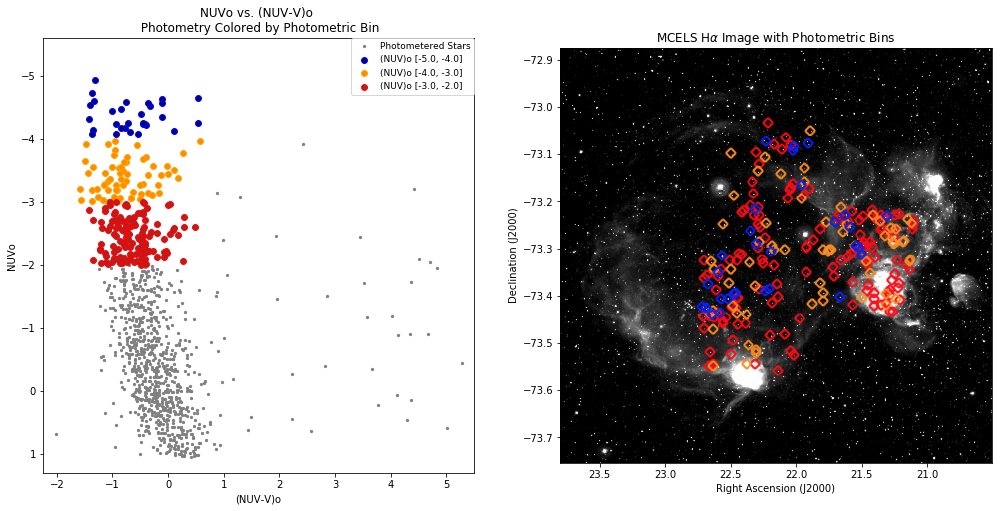

In [6]:
# Plot (NUV)o vs. (NUV-V)o CMD with photometric bins colored
plt.figure(figsize=(17,8))

# plt.subplot(311)
plt.subplot(121)
plt.scatter(nuv_v, nuv, color='grey', label="Photometered Stars", s=5, marker="o")
plt.scatter(nuv_v_a, nuv_a, color='navy', edgecolor='blue', s=35, marker="o", label='(NUV)o [-5.0, -4.0]')
plt.scatter(nuv_v_b, nuv_b, color='darkorange', edgecolor='orange', s=35, marker="o", label='(NUV)o [-4.0, -3.0]')
plt.scatter(nuv_v_c, nuv_c, color='firebrick', edgecolor='red', s=35, marker="o", label='(NUV)o [-3.0, -2.0]')
smc.plt_nuv('NUVo vs. (NUV-V)o \n Photometry Colored by Photometric Bin', True)

# MCELS image with photometric bins overlayed
im = plt.imread('images/MCELS_Spatial_Analysis.png')
# plt.subplot(313)
plt.subplot(122)
plt.imshow(im, extent=[23.8,20.51,-73.755,-72.874], aspect=3.6)
plt.title(r'MCELS H$\alpha$ Image with Photometric Bins')
plt.ylabel('Declination (J2000)')
plt.xlabel('Right Ascension (J2000)')

plt.show()